In [85]:
 import warnings
warnings.filterwarnings('ignore')

In [86]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist  # 28*28 hand writen digits from 0 to 9

In [87]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [88]:
print(x_train[40])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 178 255 105   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6 188 253 216  14
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  14 202 253 253  23
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12 199 25

In [89]:
# normalize : tranform numbers to 1 and 0

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [90]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

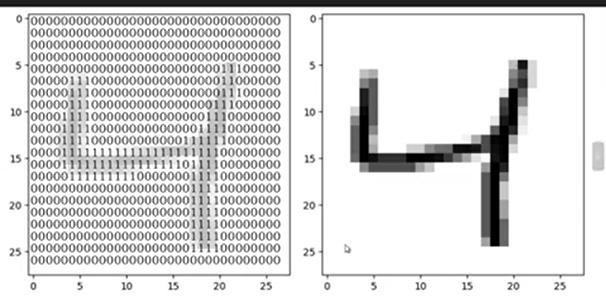

In [91]:
from IPython.display import Image
Image(filename='4.png')

y_tarin[2] : 4
x_train[2] : AxesImage(shape=(28, 28))


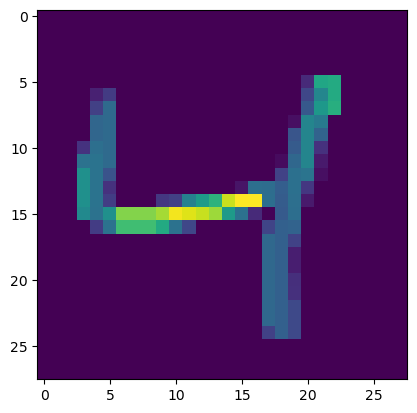

In [92]:
import matplotlib.pyplot as plt
print(f'y_tarin[2] : {y_train[2]}')
print(f'x_train[2] : {plt.imshow(x_train[2])}')


y_tarin[2] : 4
x_train[2] : AxesImage(shape=(28, 28))


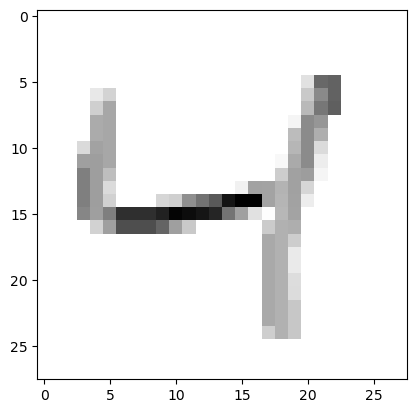

In [93]:
import matplotlib.pyplot as plt
print(f'y_tarin[2] : {y_train[2]}')
print(f'x_train[2] : {plt.imshow(x_train[2], cmap= plt.cm.binary)}')  # black and white


### Create model

In [95]:
from tensorflow.keras.activations import softmax

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # hidden layer
model.add(tf.keras.layers.Dense(10,activation=softmax)) # output layer,   10 cuz we have 0 - 9 classes



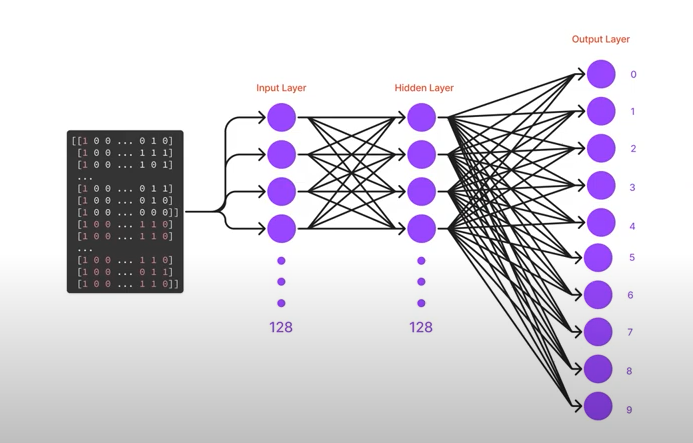

In [96]:
from IPython.display import Image
Image(filename='layers.png')

In [97]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [98]:
history = model.fit(x_train, y_train, epochs=4, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1)], validation_data=(x_train,y_train))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8723 - loss: 0.4557 - val_accuracy: 0.9648 - val_loss: 0.1206
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9665 - loss: 0.1092 - val_accuracy: 0.9792 - val_loss: 0.0657
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9793 - loss: 0.0667 - val_accuracy: 0.9823 - val_loss: 0.0558
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9837 - loss: 0.0498 - val_accuracy: 0.9873 - val_loss: 0.0391


In [99]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f'val_loss : {val_loss}  ;  val_accuracy : {val_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9654 - loss: 0.1069
val_loss : 0.0942905992269516  ;  val_accuracy : 0.9696000218391418


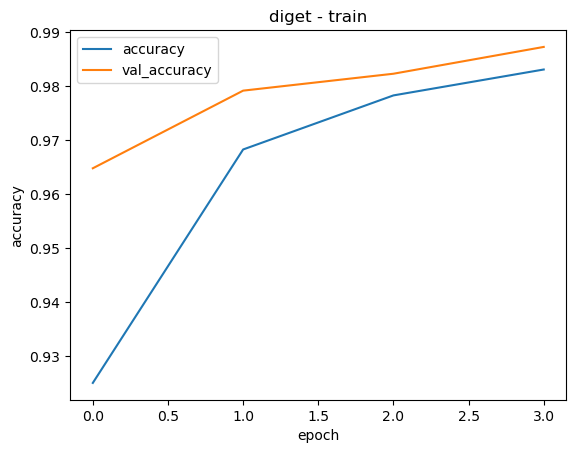

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('diget - train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

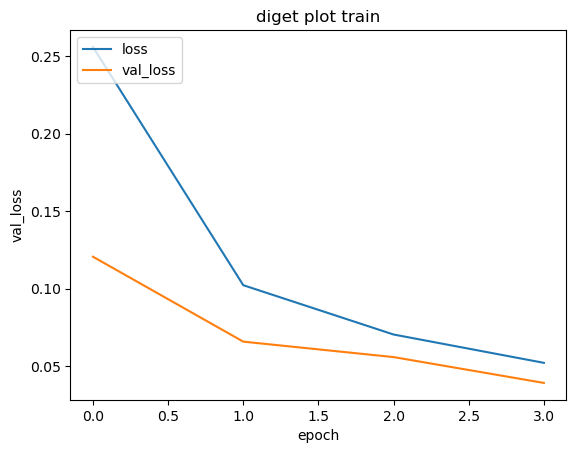

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('diget plot train')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()

In [102]:
# Saving model
model.save("model.h5")
#model.save('numbers_model.keras')

### Model experience

In [104]:
# Reuse model
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax

new_model = load_model("model.h5", custom_objects={"softmax_v2": softmax})

# For HDF5
#new_model = tf.keras.models.load_model('numbers_model.keras')

In [106]:
predictions = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


### test model

In [140]:
import numpy as np

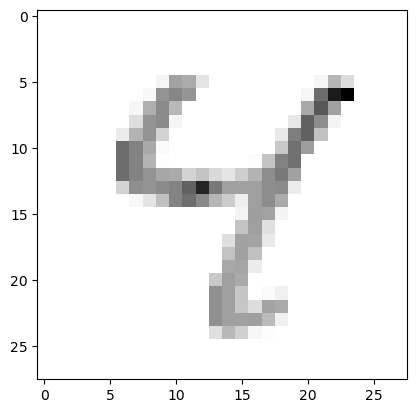

In [142]:
plt.imshow(x_test[6], cmap= plt.cm.binary)

In [144]:
print(np.argmax(predictions[6]))

4


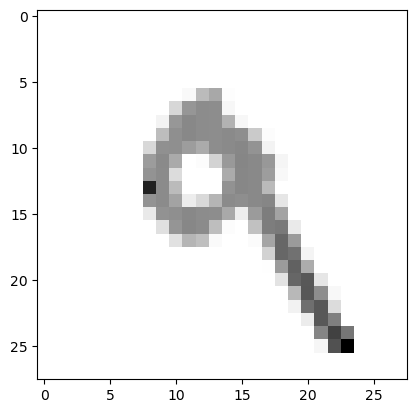

In [136]:
plt.imshow(x_test[7], cmap= plt.cm.binary)

In [138]:
print(np.argmax(predictions[7]))

9
